## House Price Prediction Project 

Dataset used : California Housing Prices
Dataset link : https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The description of the dataset is as follows:-

Longitude: A measure of how far west a house is.

Latitude: A measure of how far north a house is.

housingMedianAge: Median age of a house within a block where a lower number is a newer building.

totalRooms: Total number of rooms within a block.

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars). Median House value is better than other averages as it is not influenced by extreme values.

oceanProximity: Location of the house w.r.t ocean/sea


In [2]:
#importing the data from California Housing dataset

data = pd.read_csv("housing.csv")
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# remove missing values

data.dropna(inplace=True)

In [4]:
# Checking for null values and data-types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

# Train and Test dataset
X = data.drop(['median_house_value'], axis=1) #features
y = data['median_house_value']      #target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)
train_data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18026,-121.92,37.25,34.0,2231.0,360.0,1035.0,365.0,4.7917,<1H OCEAN,243200.0
10096,-117.94,33.93,34.0,1475.0,319.0,698.0,293.0,3.8194,<1H OCEAN,186000.0
1051,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,INLAND,144300.0
7416,-118.22,33.94,42.0,1115.0,297.0,1412.0,325.0,3.0903,<1H OCEAN,153500.0
16329,-121.34,38.02,30.0,4375.0,689.0,2038.0,709.0,5.1202,INLAND,133800.0
...,...,...,...,...,...,...,...,...,...,...
15330,-117.32,33.23,24.0,2580.0,604.0,982.0,569.0,1.6402,NEAR OCEAN,169300.0
8222,-118.23,33.76,21.0,49.0,14.0,29.0,16.0,5.0000,NEAR OCEAN,87500.0
17599,-121.89,37.31,47.0,2986.0,627.0,1399.0,613.0,3.7455,<1H OCEAN,247400.0
13797,-117.40,34.58,18.0,755.0,169.0,483.0,165.0,1.4196,INLAND,64700.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

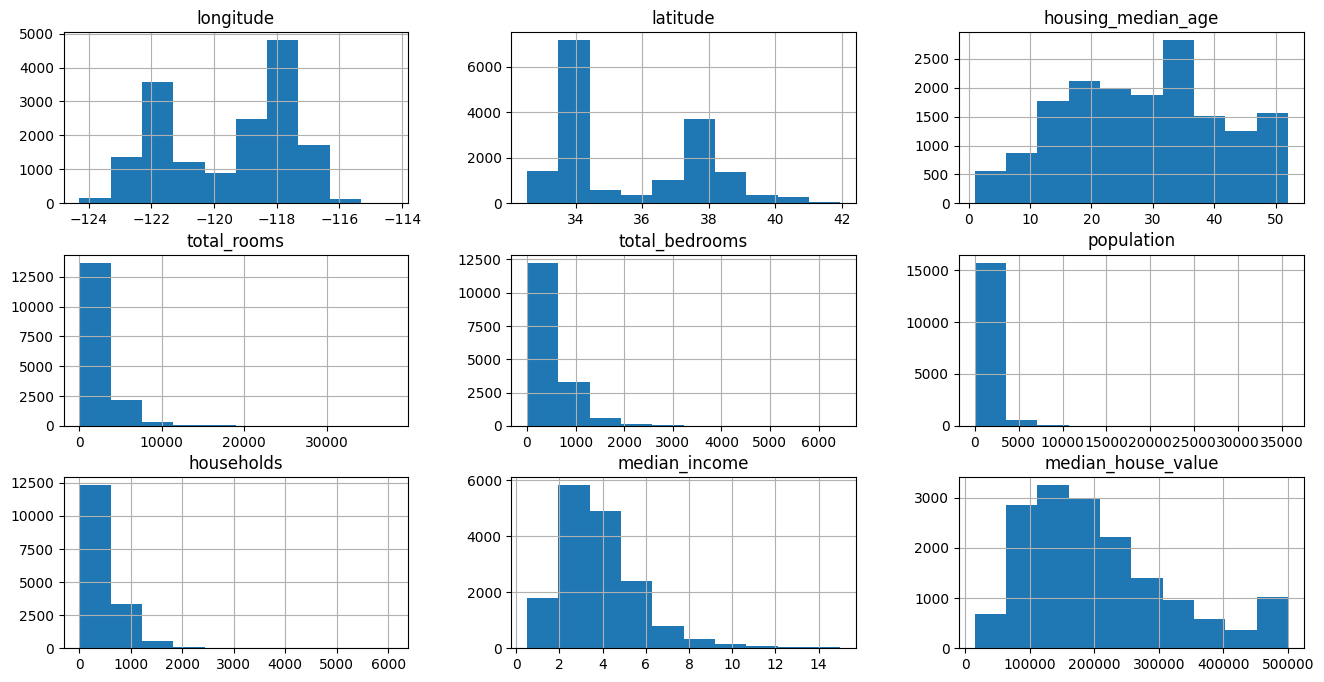

In [8]:
#returns a histogram

train_data.hist(figsize =(16,8))

C:\Users\vegra\AppData\Local\Temp\ipykernel_10068\773083927.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<AxesSubplot: >

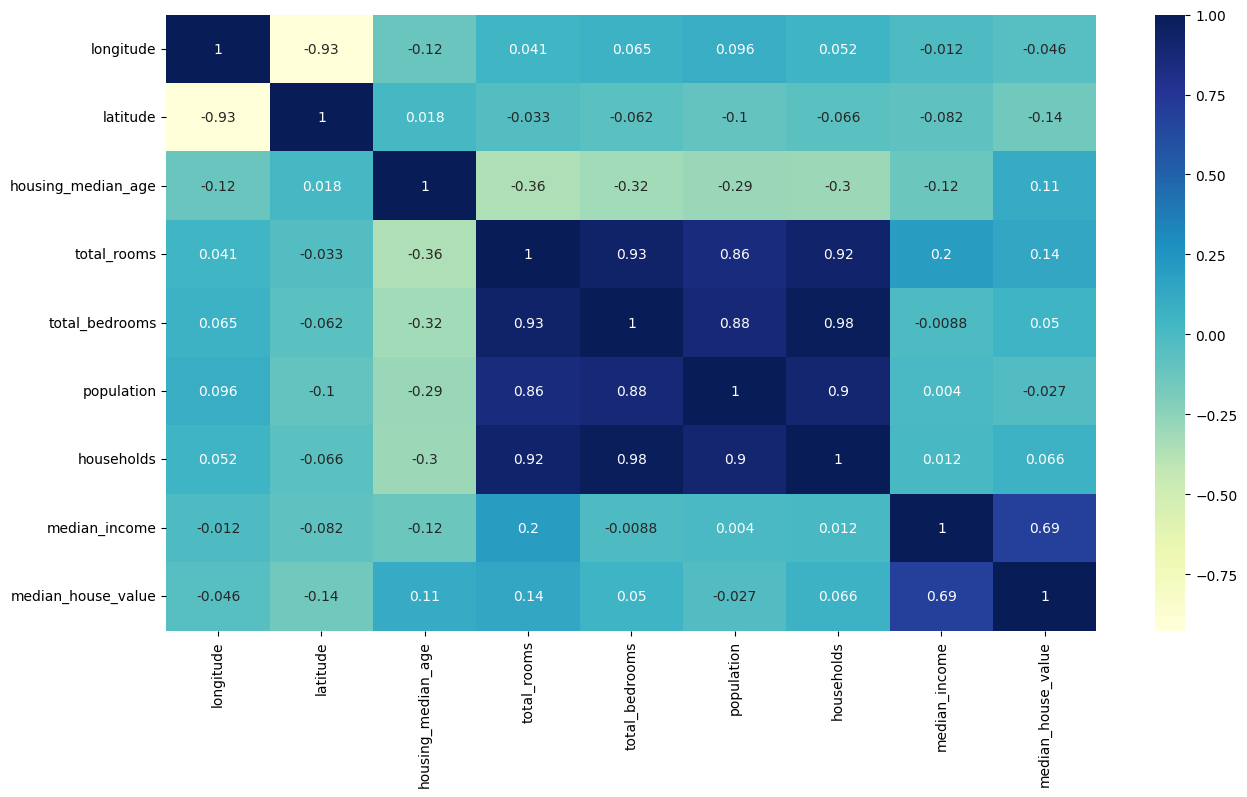

In [9]:
#returns a correlation heatmap

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

## Data Preprocessing


In [10]:
# Taking the log values of the features to get better visualisations than the former one.

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

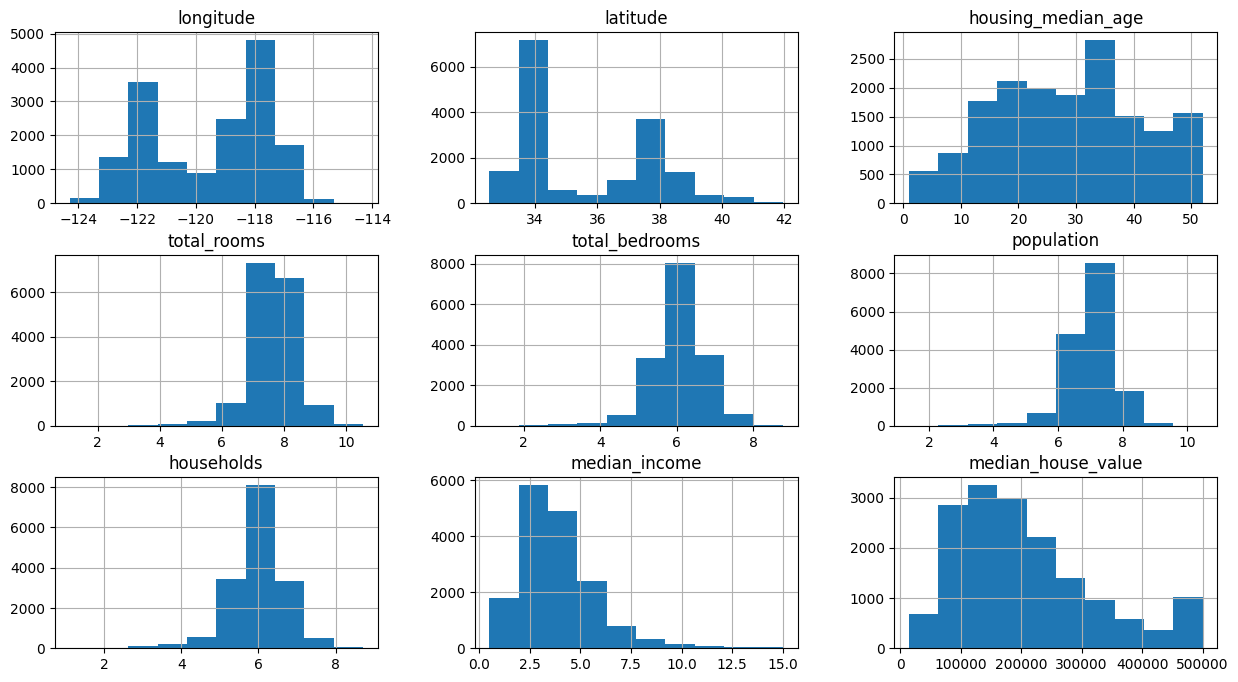

In [11]:
# This provides better histogram with better visualisations especially for total rooms, total bedrooms, and population.

train_data.hist(figsize=(15,8))

In [12]:
# Inserting dummies in the ocean_proximity parameters and dropping off the 'ocean_proximity' column

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18026,-121.92,37.25,34.0,7.710653,5.888878,6.943122,5.902633,4.7917,243200.0,1,0,0,0,0
10096,-117.94,33.93,34.0,7.297091,5.768321,6.549651,5.683580,3.8194,186000.0,1,0,0,0,0
1051,-120.71,38.34,16.0,7.137278,5.446737,6.327937,5.365976,4.4531,144300.0,0,1,0,0,0
7416,-118.22,33.94,42.0,7.017506,5.697093,7.253470,5.786897,3.0903,153500.0,1,0,0,0,0
16329,-121.34,38.02,30.0,8.383890,6.536692,7.620215,6.565265,5.1202,133800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,-117.32,33.23,24.0,7.855932,6.405228,6.890609,6.345636,1.6402,169300.0,0,0,0,0,1
8222,-118.23,33.76,21.0,3.912023,2.708050,3.401197,2.833213,5.0000,87500.0,0,0,0,0,1
17599,-121.89,37.31,47.0,8.002025,6.442540,7.244228,6.419995,3.7455,247400.0,1,0,0,0,0
13797,-117.40,34.58,18.0,6.628041,5.135798,6.182085,5.111988,1.4196,64700.0,0,1,0,0,0


<AxesSubplot: >

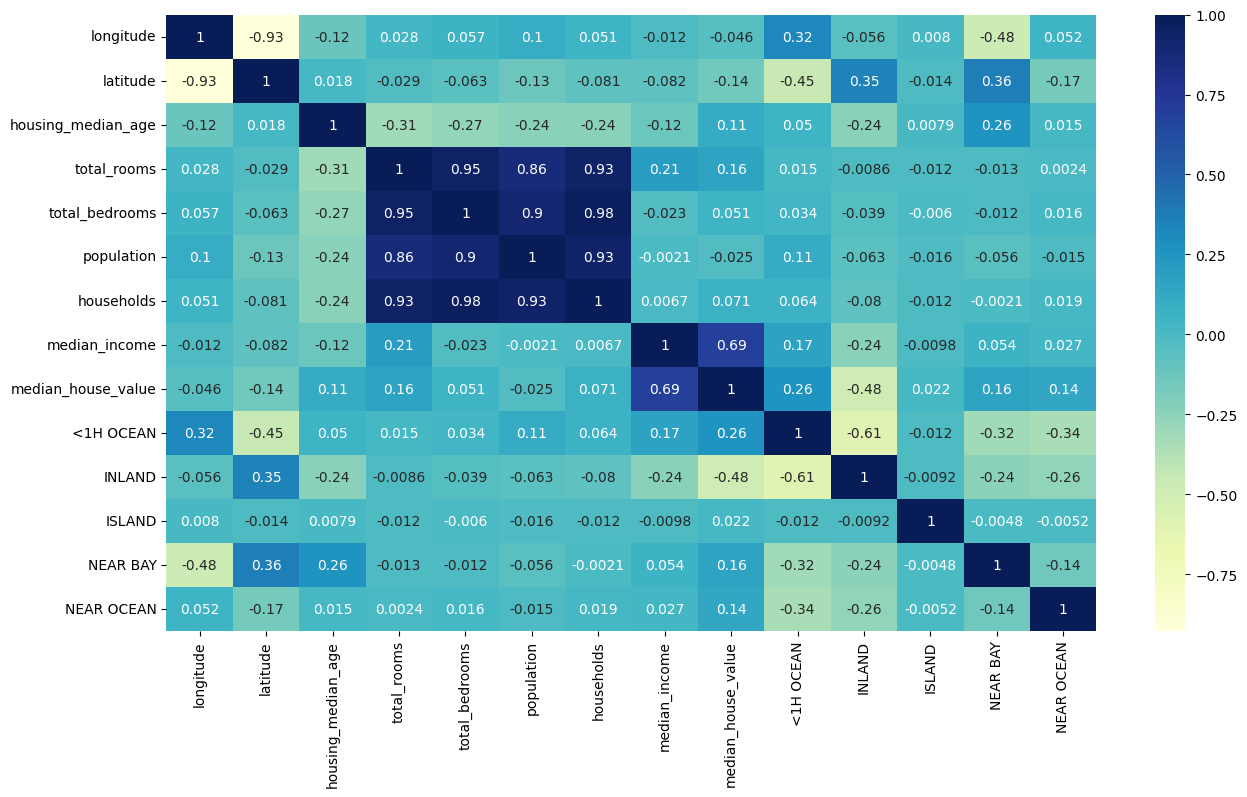

In [13]:
# returns a new heatmap with 'individual' ocean proximity features and dropping the entire 'ocean proximity' column

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

We can see from the above heatmap that median_house_value (target) has negative co-relation with INLAND (feature) i.e, you pay less price or the median price if you buy the house in land, and the opposite is true for the house that is situated less than 1 hour (<1H OCEAN) from the ocean where you have to pay a higher price.

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

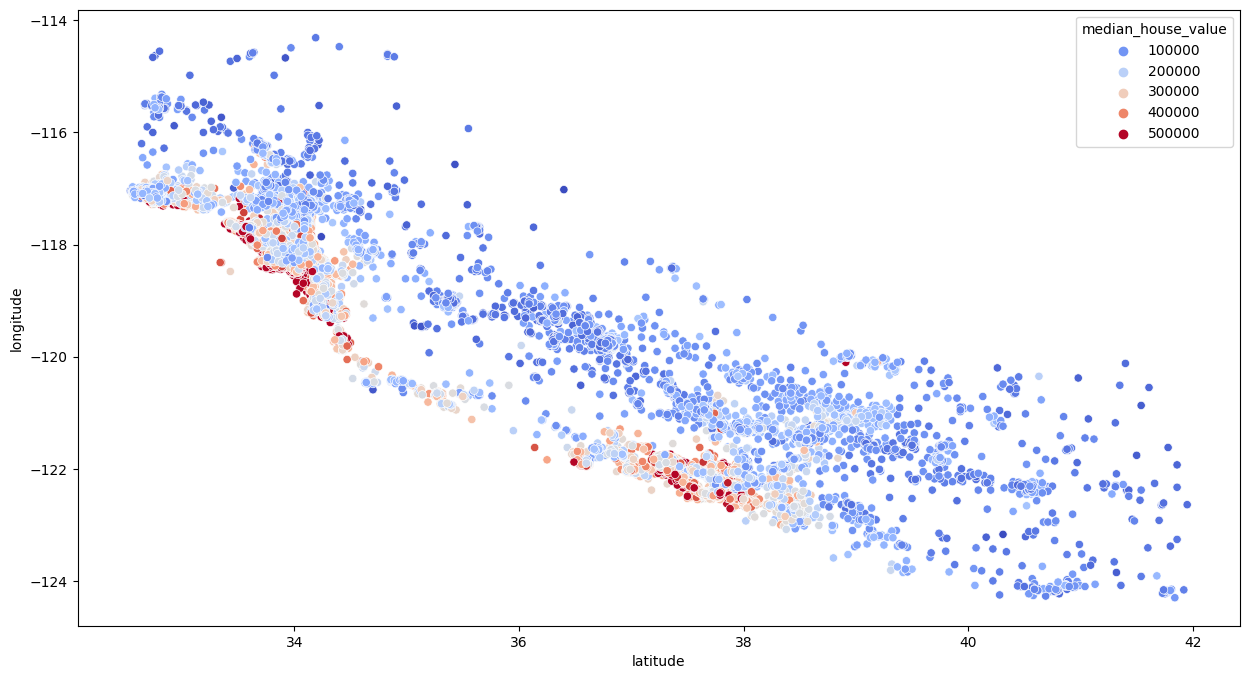

In [15]:
# returns a scatter plot showing price of houses based on location.

plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y ="longitude",data=train_data, hue ="median_house_value", palette ="coolwarm")

# Feature Engineering

In [16]:
# Getting the bedroom ratio and household rooms

train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot: >

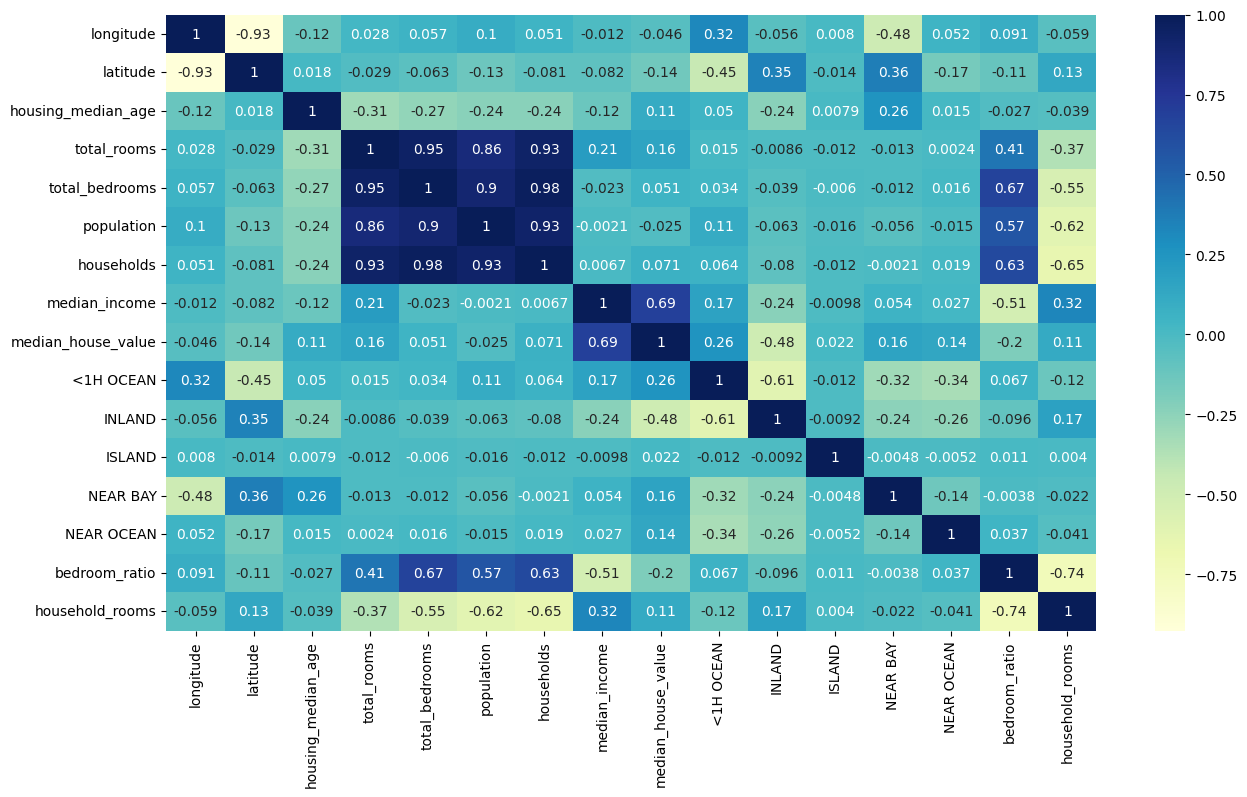

In [17]:
# shows a new correlation heatmap that includes new features

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

From the above correlation heatmap, we can see a good ratio of household rooms and total rooms with respect to the value of the house and not so interesting ratio in terms of bedroom and households ratio.

## Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,y_train)

LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [29]:
X_test_s = scaler.transform(X_test)

In [23]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1642,-121.78,37.97,4.0,9.742908,7.842671,8.942984,7.766417,5.5601,213700.0,0,1,0,0,0,0.804962,1.254492
8407,-118.34,33.93,36.0,7.332369,6.188264,7.509335,6.154858,2.2679,153900.0,1,0,0,0,0,0.843965,1.191314
1859,-124.14,41.95,21.0,7.899895,6.361302,7.097549,6.204558,2.2750,122400.0,0,0,0,0,1,0.805239,1.273241
20363,-118.95,34.16,21.0,7.990915,6.040255,7.242798,6.018593,6.5410,291500.0,1,0,0,0,0,0.755890,1.327705
4385,-118.26,34.08,52.0,6.892642,5.624018,6.902743,5.564520,2.3816,166700.0,1,0,0,0,0,0.815945,1.238677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18864,-122.21,38.10,36.0,8.012681,6.324359,7.276556,6.322565,3.8029,129900.0,0,0,0,1,0,0.789294,1.267315
15265,-117.28,33.04,12.0,8.402904,6.834109,7.812783,6.790097,3.5179,252700.0,0,0,0,0,1,0.813303,1.237523
12275,-116.97,33.96,12.0,8.678802,7.109062,8.004032,7.049255,2.4322,112100.0,0,1,0,0,0,0.819129,1.231166
11846,-120.57,39.78,15.0,7.163947,5.648974,6.368187,5.493061,2.1216,102000.0,0,1,0,0,0,0.788528,1.304181


In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18026,-121.92,37.25,34.0,7.710653,5.888878,6.943122,5.902633,4.7917,243200.0,1,0,0,0,0,0.763733,1.306307
10096,-117.94,33.93,34.0,7.297091,5.768321,6.549651,5.683580,3.8194,186000.0,1,0,0,0,0,0.790496,1.283890
1051,-120.71,38.34,16.0,7.137278,5.446737,6.327937,5.365976,4.4531,144300.0,0,1,0,0,0,0.763139,1.330099
7416,-118.22,33.94,42.0,7.017506,5.697093,7.253470,5.786897,3.0903,153500.0,1,0,0,0,0,0.811840,1.212654
16329,-121.34,38.02,30.0,8.383890,6.536692,7.620215,6.565265,5.1202,133800.0,0,1,0,0,0,0.779673,1.277007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,-117.32,33.23,24.0,7.855932,6.405228,6.890609,6.345636,1.6402,169300.0,0,0,0,0,1,0.815337,1.238005
8222,-118.23,33.76,21.0,3.912023,2.708050,3.401197,2.833213,5.0000,87500.0,0,0,0,0,1,0.692238,1.380772
17599,-121.89,37.31,47.0,8.002025,6.442540,7.244228,6.419995,3.7455,247400.0,1,0,0,0,0,0.805114,1.246422
13797,-117.40,34.58,18.0,6.628041,5.135798,6.182085,5.111988,1.4196,64700.0,0,1,0,0,0,0.774859,1.296568


In [25]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18026,-121.92,37.25,34.0,7.710653,5.888878,6.943122,5.902633,4.7917,1,0,0,0,0,0.763733,1.306307
10096,-117.94,33.93,34.0,7.297091,5.768321,6.549651,5.683580,3.8194,1,0,0,0,0,0.790496,1.283890
1051,-120.71,38.34,16.0,7.137278,5.446737,6.327937,5.365976,4.4531,0,1,0,0,0,0.763139,1.330099
7416,-118.22,33.94,42.0,7.017506,5.697093,7.253470,5.786897,3.0903,1,0,0,0,0,0.811840,1.212654
16329,-121.34,38.02,30.0,8.383890,6.536692,7.620215,6.565265,5.1202,0,1,0,0,0,0.779673,1.277007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,-117.32,33.23,24.0,7.855932,6.405228,6.890609,6.345636,1.6402,0,0,0,0,1,0.815337,1.238005
8222,-118.23,33.76,21.0,3.912023,2.708050,3.401197,2.833213,5.0000,0,0,0,0,1,0.692238,1.380772
17599,-121.89,37.31,47.0,8.002025,6.442540,7.244228,6.419995,3.7455,1,0,0,0,0,0.805114,1.246422
13797,-117.40,34.58,18.0,6.628041,5.135798,6.182085,5.111988,1.4196,0,1,0,0,0,0.774859,1.296568


In [26]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1642,-121.78,37.97,4.0,9.742908,7.842671,8.942984,7.766417,5.5601,0,1,0,0,0,0.804962,1.254492
8407,-118.34,33.93,36.0,7.332369,6.188264,7.509335,6.154858,2.2679,1,0,0,0,0,0.843965,1.191314
1859,-124.14,41.95,21.0,7.899895,6.361302,7.097549,6.204558,2.2750,0,0,0,0,1,0.805239,1.273241
20363,-118.95,34.16,21.0,7.990915,6.040255,7.242798,6.018593,6.5410,1,0,0,0,0,0.755890,1.327705
4385,-118.26,34.08,52.0,6.892642,5.624018,6.902743,5.564520,2.3816,1,0,0,0,0,0.815945,1.238677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18864,-122.21,38.10,36.0,8.012681,6.324359,7.276556,6.322565,3.8029,0,0,0,1,0,0.789294,1.267315
15265,-117.28,33.04,12.0,8.402904,6.834109,7.812783,6.790097,3.5179,0,0,0,0,1,0.813303,1.237523
12275,-116.97,33.96,12.0,8.678802,7.109062,8.004032,7.049255,2.4322,0,1,0,0,0,0.819129,1.231166
11846,-120.57,39.78,15.0,7.163947,5.648974,6.368187,5.493061,2.1216,0,1,0,0,0,0.788528,1.304181


In [30]:
 reg.score(X_test_s, y_test)

0.6756682273851939

## Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [35]:
forest.score(X_test_s,y_test)

0.8115323711345963

In [45]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4 , 8]  
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
best_forest = grid_search.best_estimator_

In [49]:
best_forest.score(X_test_s, y_test)

0.8142209331345626

In [ ]:
We can clearly see that Random Forest Model provides better result than the Linear Regression Model.

### End Remarks

• We started off with california housing price dataset with 20640 rows and 10 columns.

• Further we analysed correlation matrix and geospatial visualisation.

• Then we build our regression models and chose the best using Grid Search.

• We can see that Random Forest outperforms Linear Regression Model with a score of 81.42%.

• Overall, our model is satisfactory.
 